# Exploratory Data Analysis 

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your cleaned data
df = pd.read_csv("C:/Users/sharan/Documents/ola_ride_insights/data/clean_ola_data.csv")

# Set seaborn style
sns.set(style="whitegrid")


In [66]:
df['booking_datetime'] = pd.to_datetime(df['booking_datetime'], errors='coerce')
df['booking_date'] = df['booking_datetime'].dt.date
df['booking_hour'] = df['booking_datetime'].dt.hour


In [67]:
# using the 'date' column directly
df['booking_datetime'] = pd.to_datetime(df['date'], errors='coerce')

# and then extracting date and hour
df['booking_date'] = df['booking_datetime'].dt.date
df['booking_hour'] = df['booking_datetime'].dt.hour


### 1. DAILY RIDE VOLUME

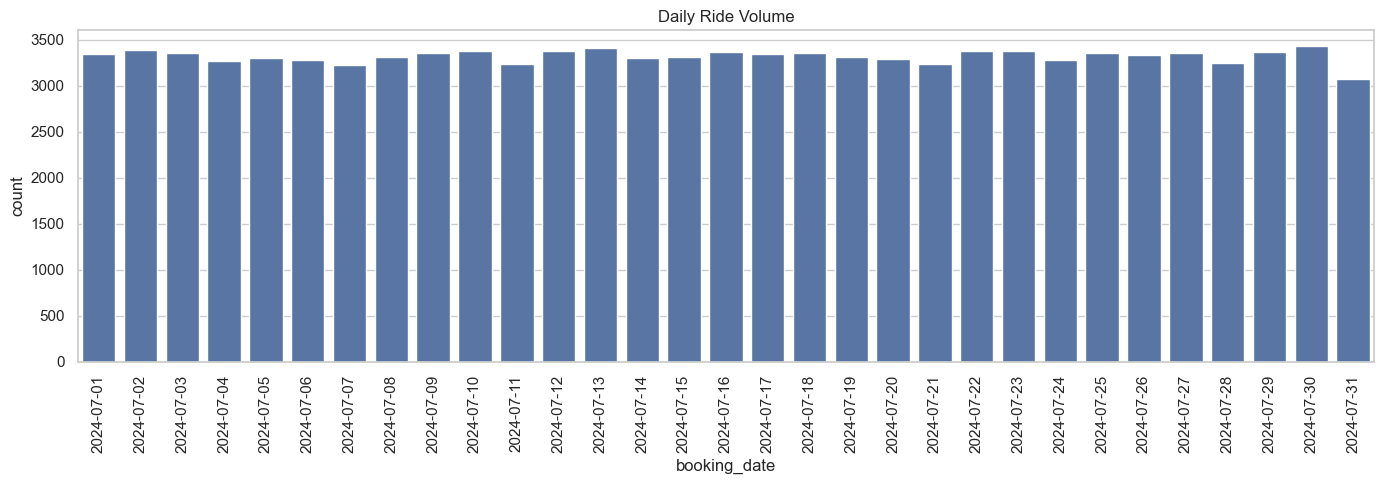

In [69]:
df['booking_datetime'] = pd.to_datetime(df['booking_datetime'])  # Ensure datetime
df['booking_date'] = df['booking_datetime'].dt.date

plt.figure(figsize=(14, 5))
sns.countplot(data=df, x='booking_date', order=df['booking_date'].value_counts().index.sort_values())
plt.xticks(rotation=90)
plt.title("Daily Ride Volume")
plt.tight_layout()
plt.savefig("C:/Users/sharan/Documents/ola_ride_insights/charts/daily_ride.png")
plt.show()


### INSIGHTS:
- Ride volumes fluctuate day to day, with certain peaks and dips. 
- This may indicate weekdays or weekends, promotions or weather effects.

### 2. HOURLY RIDE VOLUME

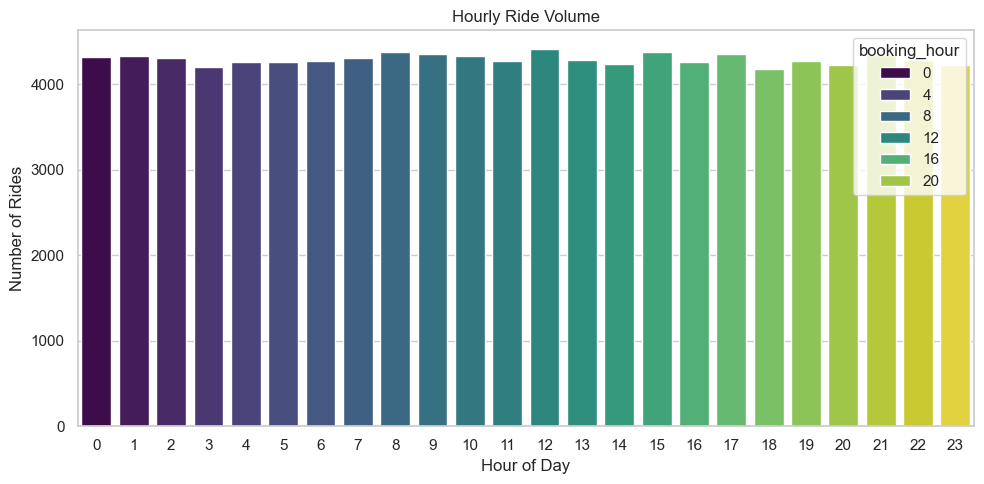

In [72]:
#hourly ride 
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='booking_hour',hue='booking_hour', palette="viridis")
plt.title("Hourly Ride Volume")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Rides")
plt.tight_layout()
plt.savefig("C:/Users/sharan/Documents/ola_ride_insights/charts/hourly_ride.png")
plt.show()


### INSIGHTS:
- Peak hours usually fall between morning commute and evening rush.
- Late-night dips show low demand.

### 3. BOOKING STATUS DISTRIBUTION

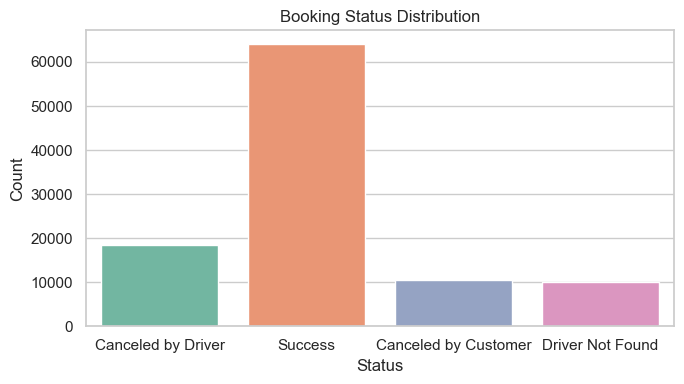

In [75]:
#booking status distribution
plt.figure(figsize=(7, 4))
sns.countplot(data=df, x='booking_status', hue='booking_status', palette="Set2")
plt.title("Booking Status Distribution")
plt.xlabel("Status")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("C:/Users/sharan/Documents/ola_ride_insights/charts/booking_status.png")
plt.show()


### INSIGHTS:
- Shows operational efficiency.
- High cancellation might require business review.

### 4. DRIVERS VS CUSTOMER RATINGS

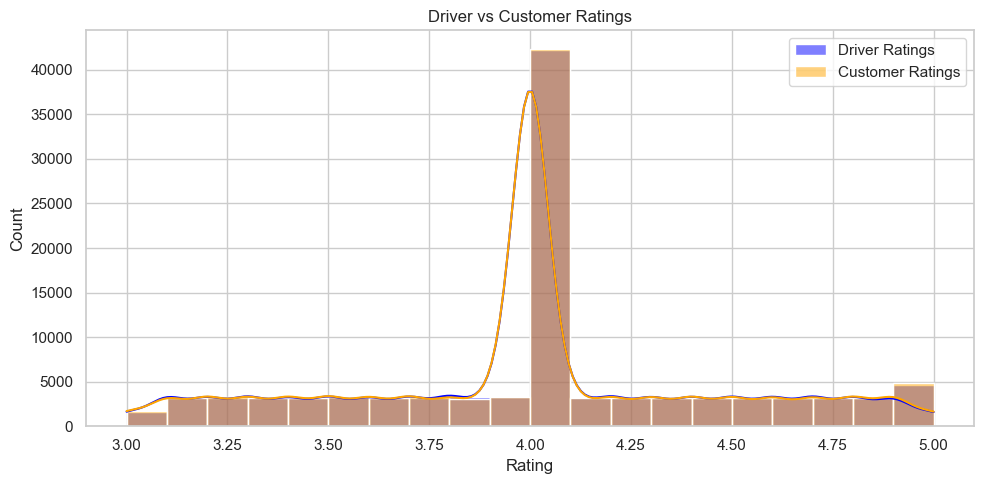

In [78]:
#ratings analysis
plt.figure(figsize=(10, 5))
sns.histplot(df['driver_ratings'], label="Driver Ratings", color='blue', kde=True, bins=20)
sns.histplot(df['customer_rating'], label="Customer Ratings", color='orange', kde=True, bins=20)
plt.legend()
plt.title("Driver vs Customer Ratings")
plt.xlabel("Rating")
plt.tight_layout()
plt.savefig("C:/Users/sharan/Documents/ola_ride_insights/charts/ratings.png")
plt.show()


### INSIGHTS:
- Both driver and customer ratings are skewed toward the higher end (4+), indicating general satisfaction.
- However, slight variation may suggest inconsistency in user experience or driver behavior.

### 5. VEHICLE TYPE AND DISTANCE

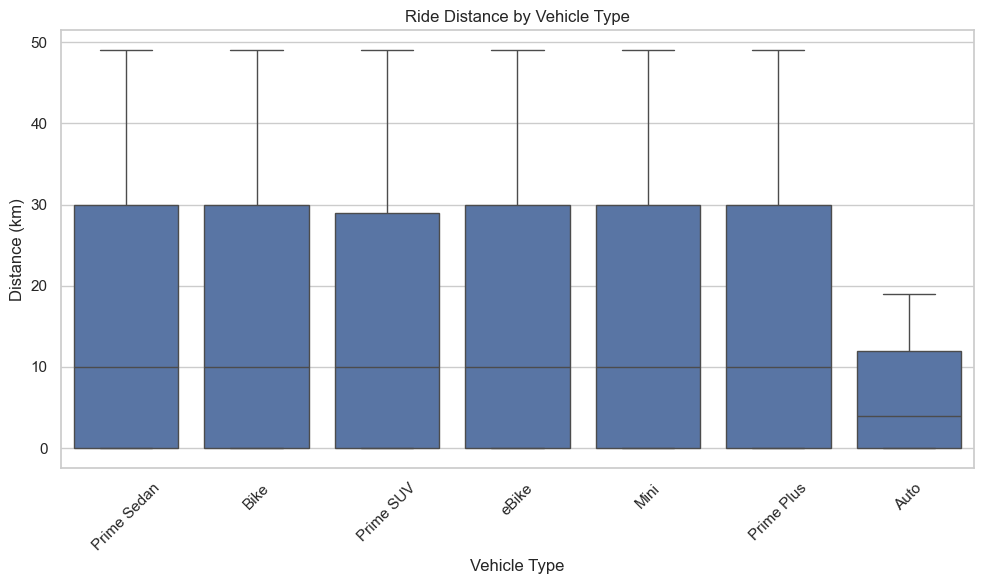

In [81]:
#vehicle type and distance
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='vehicle_type', y='ride_distance')
plt.title("Ride Distance by Vehicle Type")
plt.xlabel("Vehicle Type")
plt.ylabel("Distance (km)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("C:/Users/sharan/Documents/ola_ride_insights/charts/vehicletype_distance.png")
plt.show()


### INSIGHTS:
- Auto rickshaws are mostly used for short-distance travel.
- Sedans and SUVs like Ola Prime are preferred for longer journeys likely due to comfort and luggage space.



### 6. PAYMENT METHOD

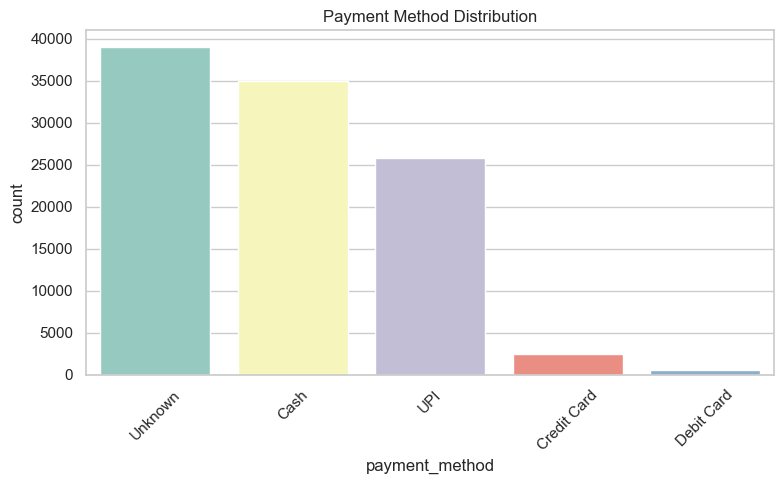

In [84]:
#payment method
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='payment_method',hue='payment_method', palette="Set3")
plt.title("Payment Method Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("C:/Users/sharan/Documents/ola_ride_insights/charts/payment_method.png")
plt.show()


### Insight: 
- The most frequent payment method is "Unknown", which likely indicates missing, legacy, or unrecorded data. This is a data quality issue and should be addressed in future data collection or cleaning steps.
- Among known methods:
  -Cash is still widely used, possibly due to convenience or preference by drivers/customers.
  - UPI and Credit Card follow, showing good adoption of digital payment options.
  - Debit Card usage is minimal, suggesting user friction or low adoption.


### Key Insights:
- Ride volume fluctuates across dates with noticeable peaks and drops. These could correspond to weekends, holidays or events. Analyzing by day-of-week may uncover more specific ride behavior patterns.

- Peak ride hours occur between 8 AM and 12 PM and again from 5 PM to 8 PM, which aligns with commute hours. Very low ride volume is seen during late-night hours (12 AM to 5 AM), as expected.

- Most rides are marked as "Success", but a significant portion are "Cancelled". This could indicate operational inefficiencies such as long wait times, driver unavailability, or booking errors.

- Both driver and customer ratings are mostly 4 stars or higher, showing generally positive user experiences. However, some variation suggests that further segmentation (by driver or location) might reveal specific issues.

- Auto rickshaws cover shorter distances on average and are typically used for local, short-range travel. Sedans, SUVs, and Ola Prime are used for longer trips, likely due to comfort or space requirements.

- The most frequent payment method is recorded as "Unknown", which likely reflects missing or unrecorded data. Among valid entries, cash is the most used method, followed by UPI and credit cards. Debit card usage is the least common, suggesting user preference for other digital options.

- Most rides are priced between ₹100 and ₹300, indicating short-to-medium distance travel. A few high-value outliers suggest longer trips or potential surge pricing effects.

- The majority of rides cover less than 15 km, confirming that Ola is primarily used for short urban commutes. A small number of rides exceed 25 km, likely airport or intercity trips.

- There is a strong positive correlation between ride distance and price. Outliers where short trips have high prices could be due to surge pricing, delays, or data errors.
